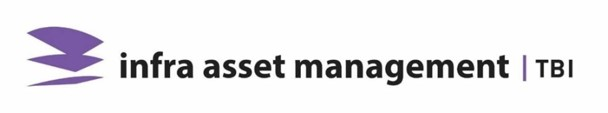

# Importeren van de benodigdheden

## Python packages 

In [1]:
import os
import json
import pandas as pd

from datetime import datetime

from storingsanalyse import StoringsAnalyse

In [2]:
""" In the line bellow fill in your API key without < and > """ 
api_key = 'bWF4YWRtaW46R21iQ1dlbkQyMDE5' # provided to you by a Maximo Consultant

""" In the line bellow fill in the desired object structure """
obj_struct = 'MXWO_SND' # name of the Maximo object structure

""" In the line bellow fill in the PO number and the SITEID without the < and > """
query = 'siteid="CT1EN2" and worktype="COR" and reportdate>="2018-01-01T00:00:00-00:00" and reportdate<="2018-03-30T00:00:00-00:00"'

In [3]:
sa = StoringsAnalyse("coentunnel", api_key, obj_struct)

In [4]:
sa.metadata.get_all_data()

,project,start_datum,contract_info,meldingen,storingen
0,Coentunnel-tracé,01_2016,"{'tijdsregistratie': 'True', 'minimale_beschik...","{'01_2016': {'45': 6, '61': 5, '23': 1, '43': ...","{'01_2016': {'61': 3, '43': 2, '45': 3, '41': ..."


## Importeren van de staging_file

De staging file geeft ruimte aan de maintenance engineers om de verschillende meldingen te categoriseren als 'Onterecht', 'Preventief', 'Storing' of 'Incident'.

In [5]:
sf_path = '../staging file/staging_file.xlsx'
sf_data = pd.read_excel(sf_path)
sf_data.head()

,werkorder,status,rapport datum,month_number,werkorder beschrijving,asset nummer,asset beschrijving,sbs,sbs omschrijving,locatie,...,werkelijke start,tijdstip einde werkzaamheden,tijdstip afmelding,tijdstip validatie,funcitoneel herstel,definitief herstel,is financieel nadeel,gmblocation3,gemeld asset,vestiging
0,1178992,SLUIT,04-01-18 15:28:00,1,"D3830570 A10, , hm-paal 32,410. P rijstrook 1 ...",NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:42:00,NaN,NaN,NaN,NaN,True,NaN,NaN,CT1EN2
1,1178993,SLUIT,06-01-18 00:32:00,1,D3830580 Coentunnel Intercom instalaltie koppe...,NaN,NaN,NaN,NaN,NaN,...,NaN,06-01-18 11:23:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
2,1178994,SLUIT,06-01-18 20:18:00,1,D3830595 Coentunnel Overdruk pompruimte en kel...,NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:46:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
3,1178995,SLUIT,07-01-18 07:50:00,1,"D3830605 A10 . Westbuis, pompkelder. Er is gee...",NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:44:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
4,1180768,SLUIT,08-01-18 17:10:00,1,D3830630 Afsluitboom Noord Rechts is niet besc...,C1279,"A10 AB 30,670n BBL (AK) - Afsluitboomkast (boo...",45-02,(AB CT1-N-02A/02B) CT1-W2 hoofdrijbaan,NaN,...,NaN,08-01-18 17:36:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2


In [6]:
sf_name = "staging_file.xlsx"
sa.read_staging_file(filename=sf_name)

'Done.'

### Aanpassen van de staging_file -- DEZE STAP WORDT VERWIJDERD IN DE TOEKOMST
Het opbouwen van deze automatische storingsanalyse vraagt om een ingevulde kolom 'type melding'. Om het process van opbouwen niet te laten stagneren op dit aspect, wordt er hieronder fictive data gegenereerd. Met behulp van de fictieve data wordt het genereren van de verschillende tabellen en grafieken gebouwd.

In [7]:
from random import randrange

lijst_opties = ['Storing', 'Incident', 'Preventief', 'Onterecht']

random_ranges = [lijst_opties[randrange(0, 4, 1)] for _ in range(len(sf_data['type melding (Storing/Incident/Preventief/Onterecht)']))]

print(len(random_ranges) == len(sf_data['type melding (Storing/Incident/Preventief/Onterecht)']))

sf_data.loc[:, 'type melding (Storing/Incident/Preventief/Onterecht)'] = random_ranges

random_ranges[:10]

True


['Storing',
 'Storing',
 'Storing',
 'Storing',
 'Storing',
 'Storing',
 'Incident',
 'Incident',
 'Incident',
 'Preventief']

In [8]:
import numpy as np
lijst_opties = ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', np.nan]

random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['probleemcode']))]

print(len(random_ranges) == len(sf_data['probleemcode']))

sf_data.loc[:, 'probleemcode'] = random_ranges

random_ranges[:10]

True


['P04', 'P08', 'P04', 'P11', 'P04', 'P08', 'P08', 'P02', 'P09', 'P08']

In [9]:
lijst_opties = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 
                'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', np.nan]

random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['oorzaak code']))]

print(len(random_ranges) == len(sf_data['oorzaak code']))

sf_data.loc[:, 'oorzaak code'] = random_ranges

random_ranges[:10]

True


['C06', 'C15', 'C05', 'C12', 'C12', 'C05', 'C07', 'C16', 'C14', 'C16']

In [10]:
lijst_opties = ['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', np.nan]

random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['oplos code']))]

print(len(random_ranges) == len(sf_data['oplos code']))

sf_data.loc[:, 'oplos code'] = random_ranges

random_ranges[:10]

True


['S02', 'S07', 'S01', 'S07', 'S03', 'S01', 'S05', 'S01', 'S02', 'S08']

In [11]:
sf_data.iloc[:5, 15:25]

,locatie 2,locatie 2 omschrijving,probleemcode,beschrijving probleem,oorzaak code,beschrijving oorzaak,oplos code,oplossing beschrijving,uitgevoerde werkzaamheden,type melding (Storing/Incident/Preventief/Onterecht)
0,NaN,NaN,P04,Lussen vermoedelijk vekeerd om aangesloten,C06,Davinci,S02,NaN,Storing ontvangen op 4 januari 2018 om 15:28 g...,Storing
1,NaN,NaN,P08,Intercom installatie niet beschikbaar,C15,NaN,S07,NaN,Storing ontvangen op 6 januari 2018 om 0:23 ge...,Storing
2,NaN,NaN,P04,Overdruk ruimte pompkelder niet aanwezig,C05,Vorst bewaking,S01,NaN,Storing ontvangen op 6 juniari 2018 om 20:18 g...,Storing
3,NaN,NaN,P11,Geen overdruk aanwezig pompkelders CT1,C12,NaN,S07,NaN,Storing ontvangen op 7 januari 2018 om 7:50 ge...,Storing
4,NaN,NaN,P04,Afsluitboom Noord W2 rechts melding niet besch...,C12,NaN,S03,NaN,Storing ontvangen op 8 januari 2018 om 17:10 g...,Storing


# Analyse

## Aantal meldingen per maand